In [141]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import argparse
import scipy.signal as sig

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12

def compareMF(file1, file2, outfile=None, index=True, mag=True):
    f1 = np.load(file1)
    f2 = np.load(file2)
    if index:
        t = np.arange(f1['data'].size)
    else:
        t = f1['t0'] + np.arange(f1['data'].size)*f1['Ts']
    plt.figure()
    if mag:
        plt.plot(t, np.abs(f1['data']), "C0-", label="gw1")
        plt.plot(t, np.abs(f2['data']), "C1-", label="gw2")
    else:
        plt.plot(t, f1['data'].real, "C0-", label="r1")
        plt.plot(t, f1['data'].imag, "C1-", label="i1")
        plt.plot(t, f2['data'].real, "C2-", label="r2")
        plt.plot(t, f2['data'].imag, "C3-", label="i2")
    if index:
        plt.xlabel("index")
    else:
        plt.xlabel("time (s)")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    if outfile:
        plt.savefig(outfile, format='pdf')
        
def compareMFIndex(file1, file2, start, stop, outfile=None, index=True, mag=True):
    f1 = np.load(file1)
    f2 = np.load(file2)
    if index:
        t = np.arange(start, stop)
    else:
        t = f1['t0'] + np.arange(start, stop)*f1['Ts']
    plt.figure()
    if mag:
        plt.plot(t, np.abs(f1['data'][start:stop]), "C0-", label="gw1")
        plt.plot(t, np.abs(f2['data'][start:stop]), "C1-", label="gw2")
    else:
        plt.plot(t, f1['data'][start:stop].real, "C0-", label="r1")
        plt.plot(t, f1['data'][start:stop].imag, "C1-", label="i1")
        plt.plot(t, f2['data'][start:stop].real, "C2-", label="r2")
        plt.plot(t, f2['data'][start:stop].imag, "C3-", label="i2")
    if index:
        plt.xlabel("index")
    else:
        plt.xlabel("time (s)")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    if outfile:
        plt.savefig(outfile, format='pdf')
        
def compareUpsampled(file1, file2, center, upFactor, width=2, window=1024, outfile=None, mag=True):
    def selectiveUpsample(data, center, upFactor, width=2, window=1024):
        wstart = int(center - window/2)
        wend = int(center + window/2)
        dstart = int(center - width/2)
        dend = int(center + width/2)

        idat = np.arange(wstart, wend)  # indices of original data 
        iup = np.arange(dstart, dend, 1/upFactor)  # new indices to use for upsampled version
        idiff = np.reshape(iup, (-1, 1)) - np.reshape(idat, (1, -1))  # differences in indices
        result = np.dot(np.sinc(idiff), data[wstart:wend])
        return result, iup
    
    f1 = np.load(file1)
    f2 = np.load(file2)
    
    print("data sampling rates: ", f1['Ts'], f2['Ts'])
    
    wstart = int(center - window/2)
    wend = int(center + window/2)
    dstart = int(center - width/2)
    dend = int(center + width/2)
    t = np.arange(dstart, dend)
        
    up1, tup1 = selectiveUpsample(f1['data'], center, upFactor, width, window)
    up2, tup2 = selectiveUpsample(f2['data'], center, upFactor, width, window)
    
    
    plt.figure()
    if mag:
        plt.plot(tup1, np.abs(up1), "C0-")
        plt.plot(t, np.abs(f1['data'][dstart:dend]), "C0.", label="gw1")
        plt.plot(tup2, np.abs(up2), "C1-")
        plt.plot(t, np.abs(f2['data'][dstart:dend]), "C1.", label="gw2")
    else:
        plt.plot(tup1, up1.real, "C0-")
        plt.plot(tup1, up1.imag, "C1-")
        plt.plot(t, f1['data'][dstart:dend].real, "C0.", label="real(gw1)")
        plt.plot(t, f1['data'][dstart:dend].imag, "C1.", label="imag(gw1)")
        plt.plot(tup2, up2.real, "C2-")
        plt.plot(tup2, up2.imag, "C3-")
        plt.plot(t, f2['data'][dstart:dend].real, "C2.", label="real(gw2)")
        plt.plot(t, f2['data'][dstart:dend].imag, "C3.", label="imag(gw2)")

    plt.xlabel("sample index ($T_s$ = {:.2f} Msps)".format(np.round(f1['Ts']*1e6, 2)))
    plt.ylabel("magnitude")
    plt.grid()
    plt.legend(fontsize='x-small', loc='upper right')
    plt.tight_layout()
    if outfile:
        plt.savefig(outfile, format='pdf')


data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


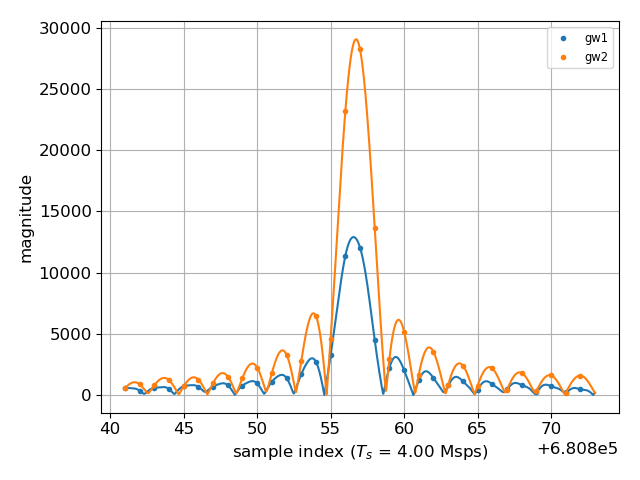

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


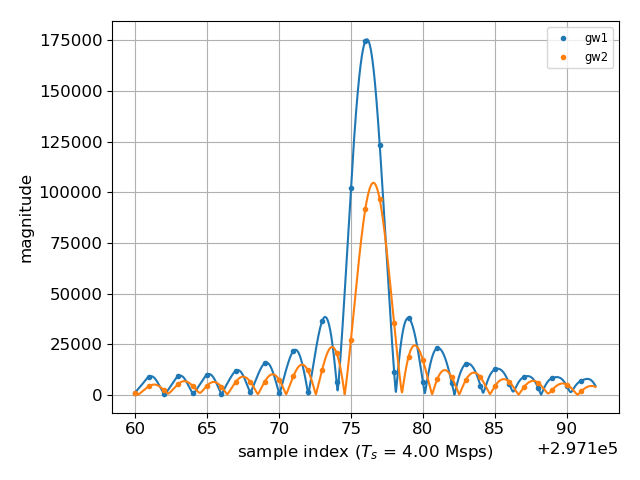

In [128]:
# scott position 1 904
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-41-05.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-41-05.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 680700, 681100)
# compareUpsampled(fileegg, filebanana, 680857, 100, width=32, window=1024, outfile=None, mag=True)
compareUpsampled(fileegg, filebanana, 680857, 100, width=32, window=1024, outfile="results/scott1_904.pdf", mag=True)

# scott position 1 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_433.750M_2020-06-13_17-41-15.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_433.750M_2020-06-13_17-41-15.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 297000, 297400)
# compareUpsampled(fileegg, filebanana, 297176, 100, width=32, window=1024, outfile=None, mag=True)
compareUpsampled(fileegg, filebanana, 297176, 100, width=32, window=1024, outfile="results/scott1_434.pdf", mag=True)

plt.show()

<IPython.core.display.Javascript object>


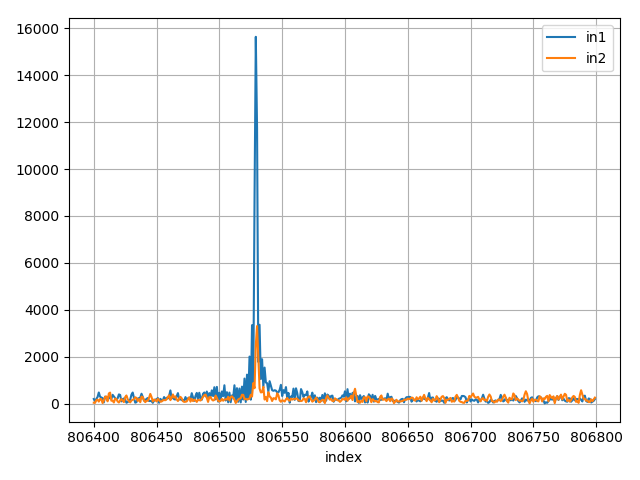

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


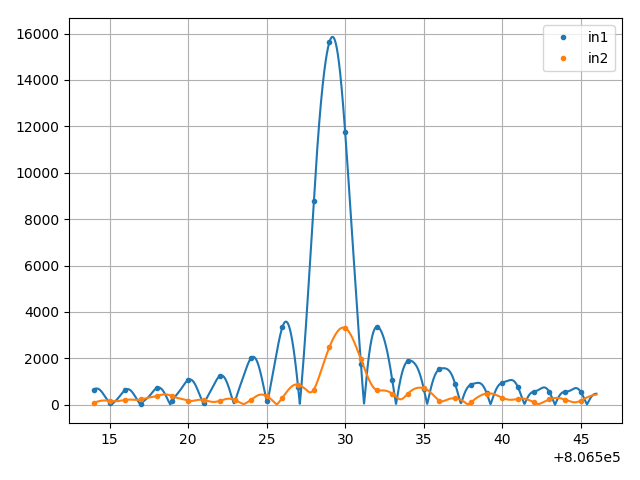

<IPython.core.display.Javascript object>


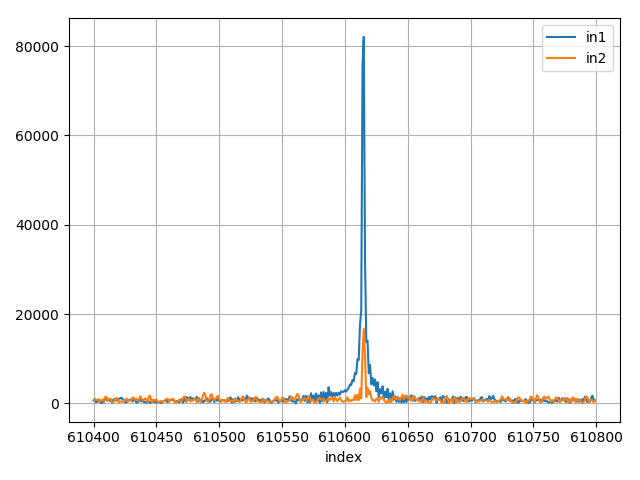

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


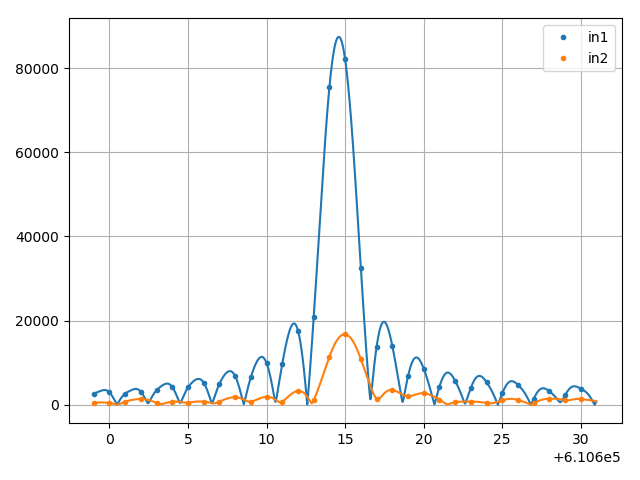

In [101]:
# scott position 2 904
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-42-29.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-42-29.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 806400, 806800)
compareUpsampled(fileegg, filebanana, 806530, 100, width=32, window=1024, outfile=None, mag=True)

# scott position 2 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_433.750M_2020-06-13_17-41-51.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_433.750M_2020-06-13_17-41-51.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 610400, 610800)
compareUpsampled(fileegg, filebanana, 610615, 100, width=32, window=1024, outfile=None, mag=True)

plt.show()

<IPython.core.display.Javascript object>


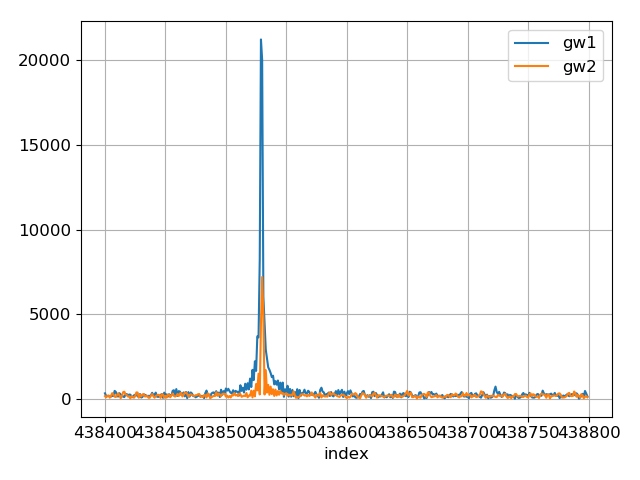

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


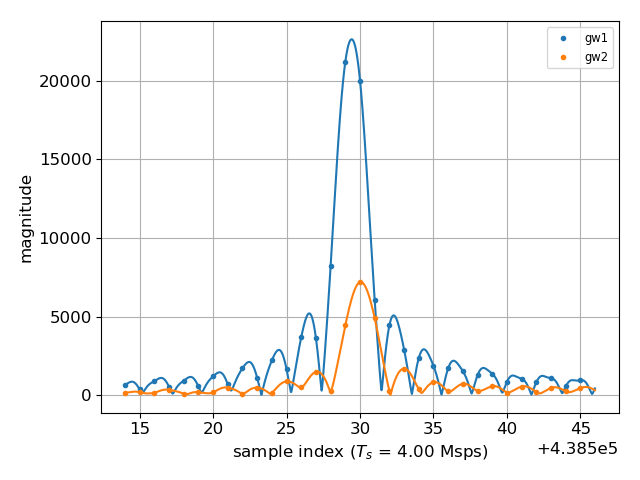

<IPython.core.display.Javascript object>


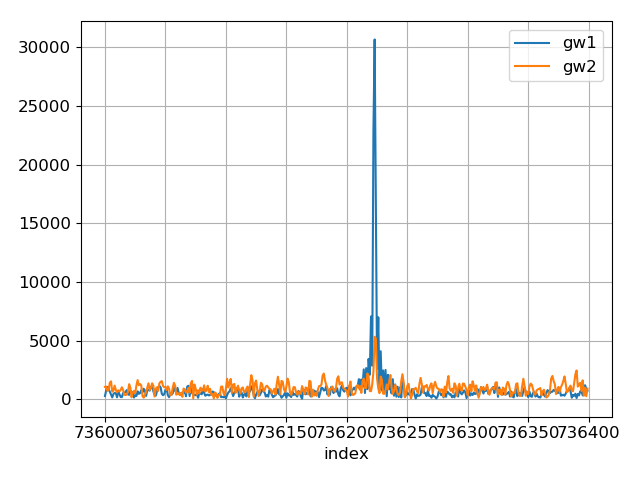

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


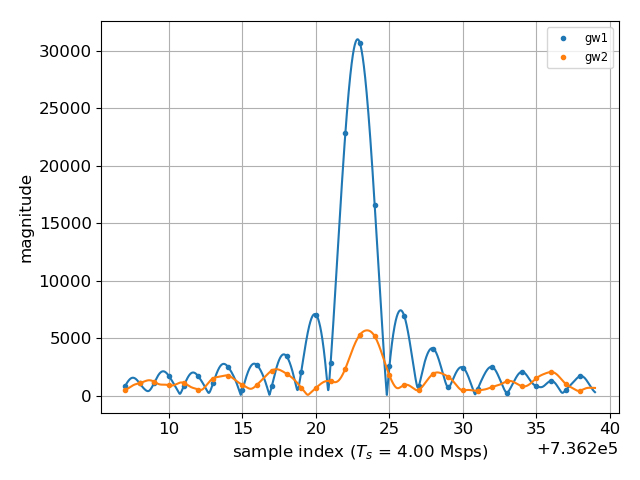

In [129]:
# scott position 3 904
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-43-05.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-43-05.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 438400, 438800)
# compareUpsampled(fileegg, filebanana, 438530, 100, width=32, window=1024, outfile=None, mag=True)
compareUpsampled(fileegg, filebanana, 438530, 100, width=32, window=1024, outfile="results/scott3_904.pdf", mag=True)

# scott position 3 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_433.750M_2020-06-13_17-43-15.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_433.750M_2020-06-13_17-43-15.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 736000, 736400)
# compareUpsampled(fileegg, filebanana, 736223, 100, width=32, window=1024, outfile=None, mag=True)
compareUpsampled(fileegg, filebanana, 736223, 100, width=32, window=1024, outfile="results/scott3_434.pdf", mag=True)

plt.show()

<IPython.core.display.Javascript object>


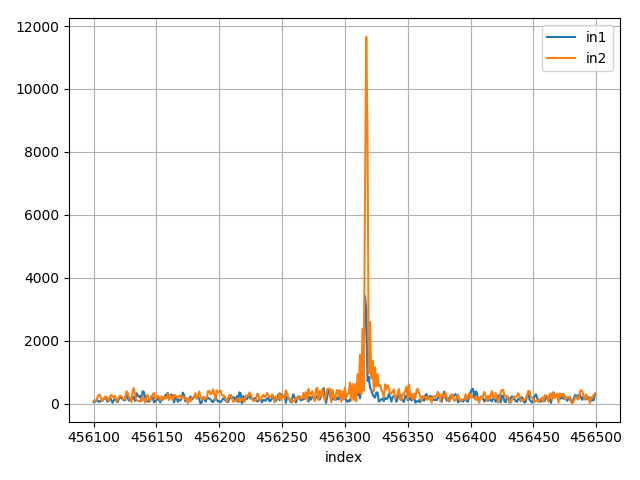

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


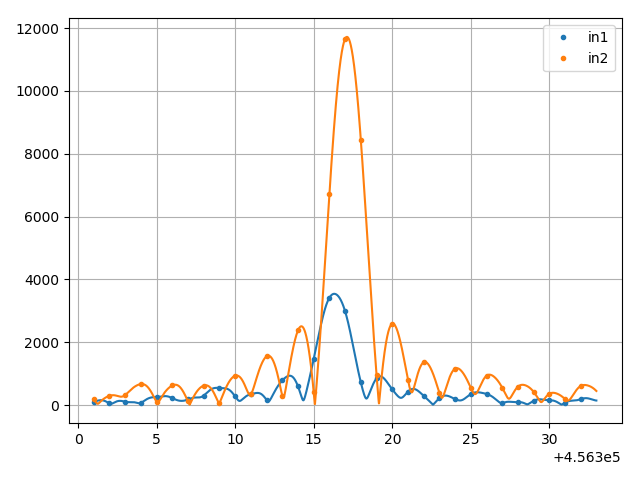

<IPython.core.display.Javascript object>


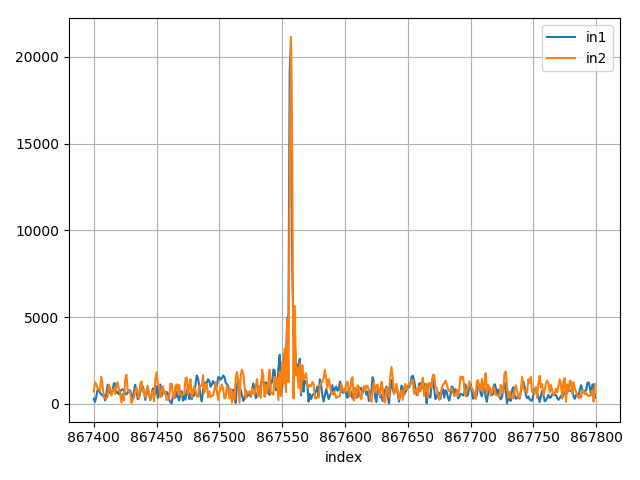

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


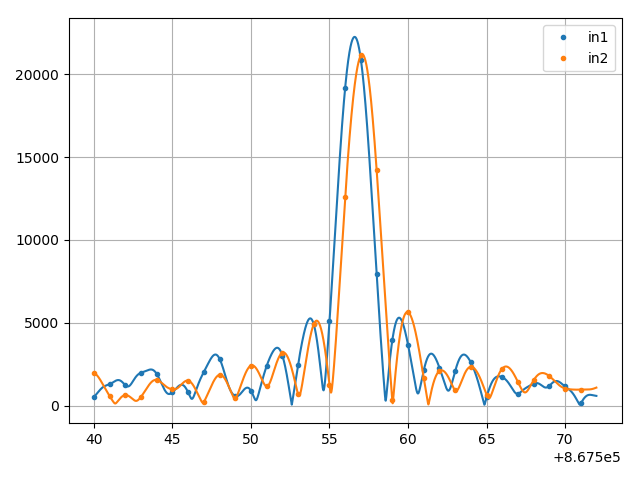

In [104]:
# scott position 4 904
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-43-44.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-43-44.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 456100, 456500)
compareUpsampled(fileegg, filebanana, 456317, 100, width=32, window=1024, outfile=None, mag=True)

# scott position 3 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_433.750M_2020-06-13_17-43-54.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_433.750M_2020-06-13_17-43-54.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 867400, 867800)
compareUpsampled(fileegg, filebanana, 867556, 100, width=32, window=1024, outfile=None, mag=True)

plt.show()

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


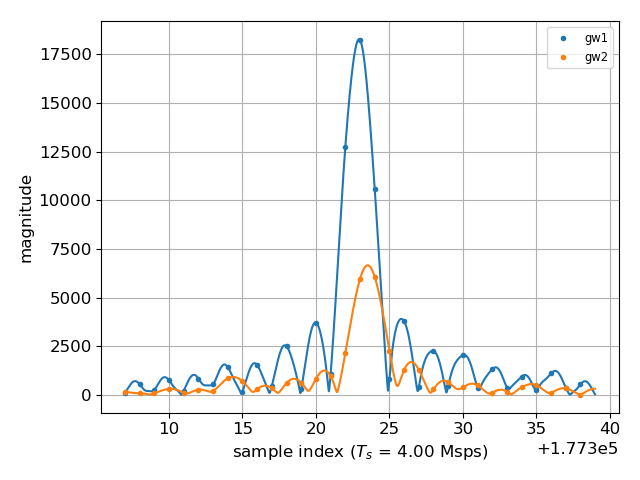

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


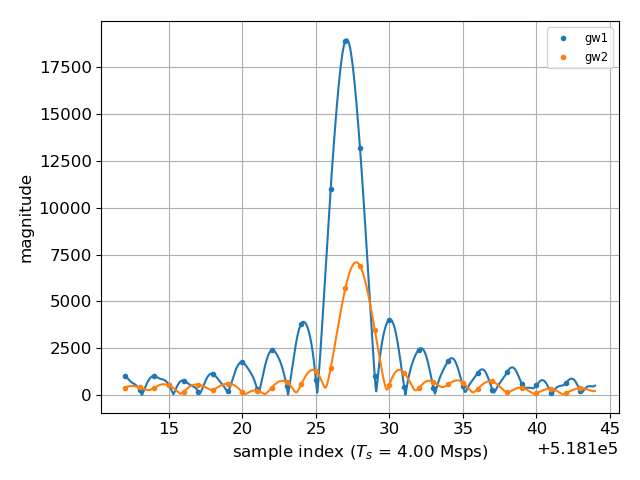

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


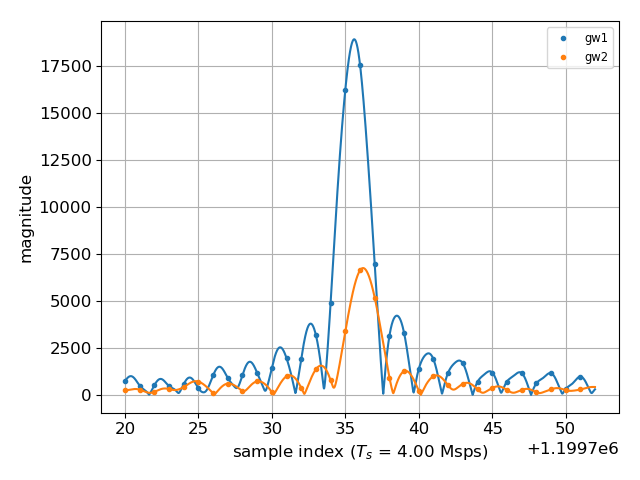

In [136]:
# bridge end 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_18-04-12.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_18-04-12.000.dat.npz'


# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 518000, 518400)
compareUpsampled(fileegg, filebanana, 177323, 100, width=32, window=1024, outfile="results/bridgeend_t1_905.pdf", mag=True)
compareUpsampled(fileegg, filebanana, 518128, 100, width=32, window=1024, outfile="results/bridgeend_t2_905.pdf", mag=True)
compareUpsampled(fileegg, filebanana, 1199736, 100, width=32, window=1024, outfile="results/bridgeend_t3_905.pdf", mag=True)

<IPython.core.display.Javascript object>


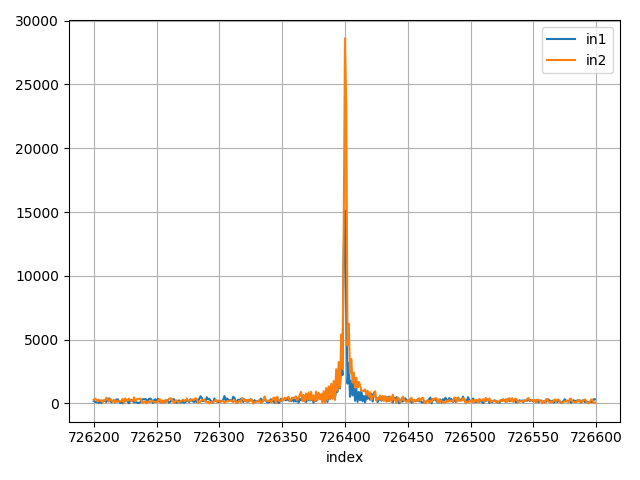

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


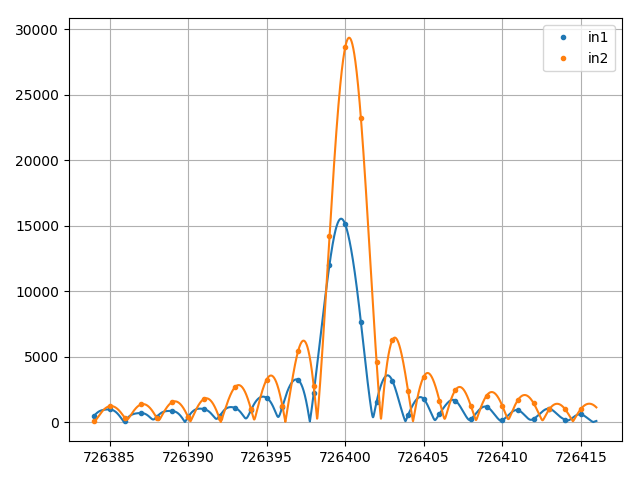

In [79]:
# bridge 6 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_18-03-23.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_18-03-23.000.dat.npz'


# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 726200, 726600)
compareUpsampled(fileegg, filebanana, 726400, 100, width=32, window=1024, outfile=None, mag=True)

<IPython.core.display.Javascript object>


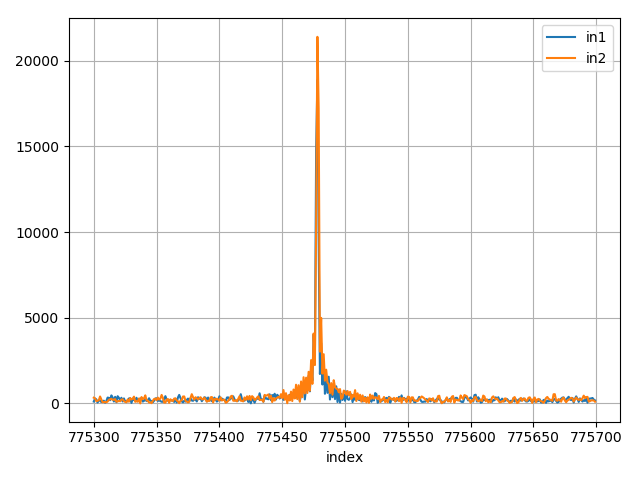

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


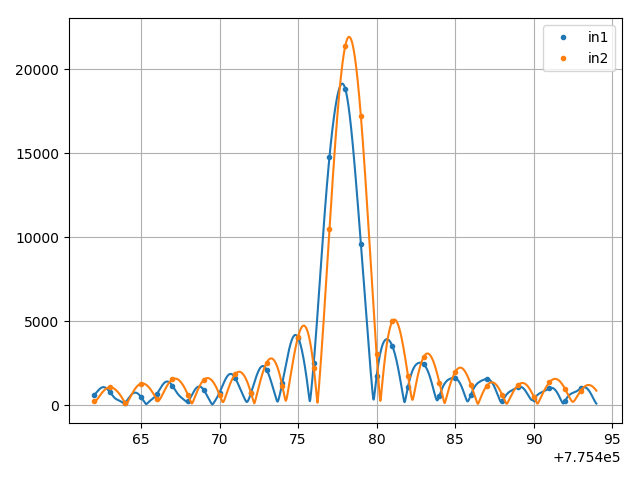

<IPython.core.display.Javascript object>


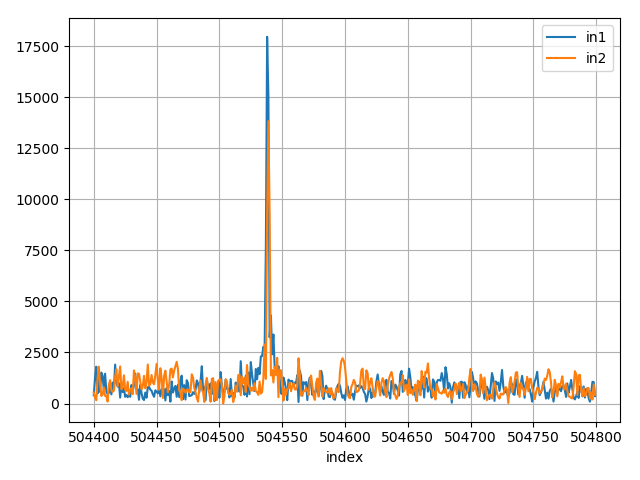

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


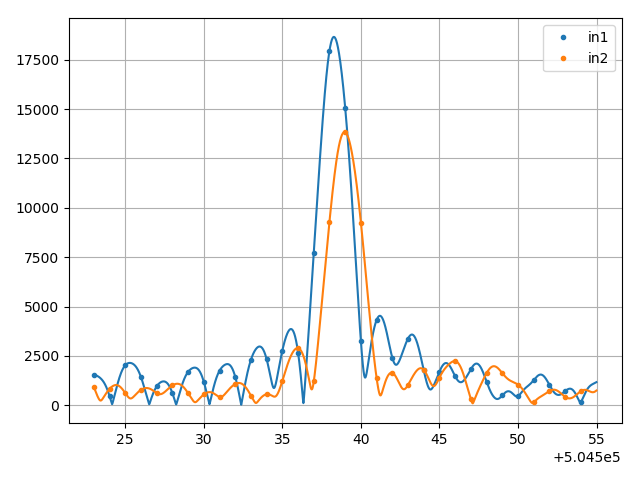

In [106]:
# bridge 5 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_18-02-36.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_18-02-36.000.dat.npz'


# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 775300, 775700)
compareUpsampled(fileegg, filebanana, 775478, 100, width=32, window=1024, outfile=None, mag=True)

# bridge 5 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_433.750M_2020-06-13_18-02-46.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_433.750M_2020-06-13_18-02-46.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 504400, 504800)
compareUpsampled(fileegg, filebanana, 504539, 100, width=32, window=1024, outfile=None, mag=True)

<IPython.core.display.Javascript object>


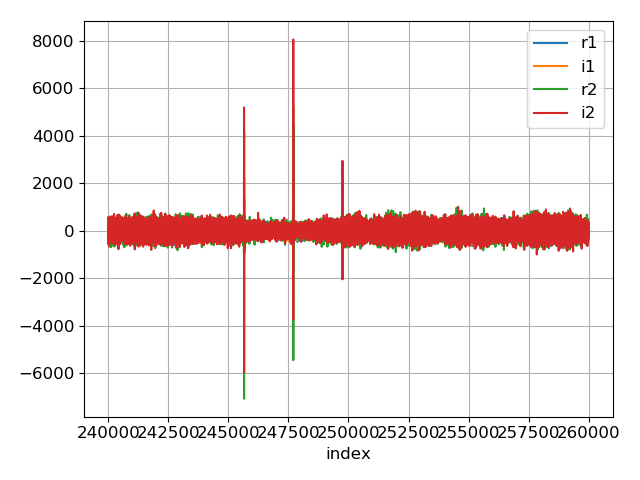

In [139]:
# bridge start 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-58-50.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-58-50.000.dat.npz'


# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 240000, 260000, mag=False)
# compareUpsampled(fileegg, filebanana, 247702, 100, width=32, window=1024, outfile=None, mag=True)

<IPython.core.display.Javascript object>


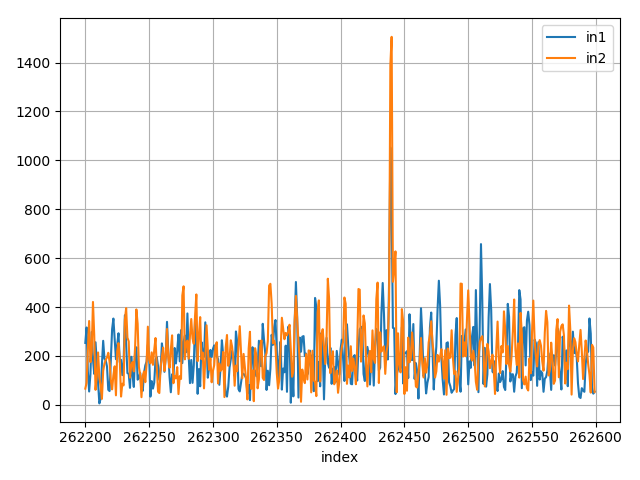

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


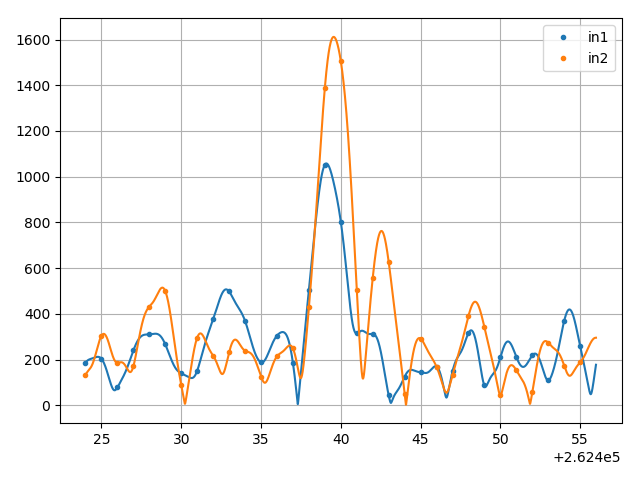

In [85]:
# frew 3 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-55-40.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-55-40.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 262200, 262600)
compareUpsampled(fileegg, filebanana, 262440, 100, width=32, window=1024, outfile=None, mag=True)

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


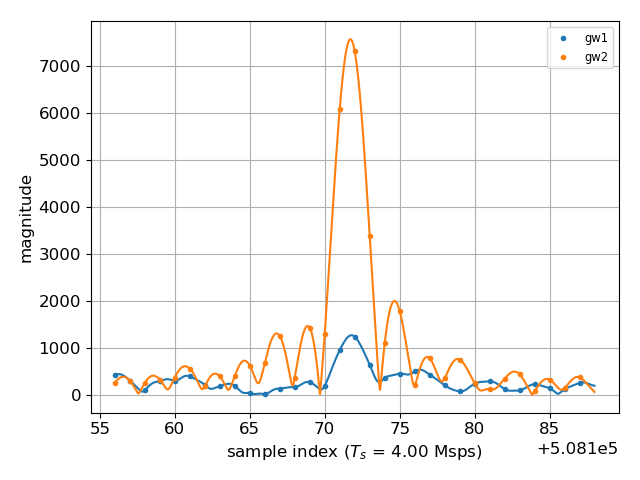

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


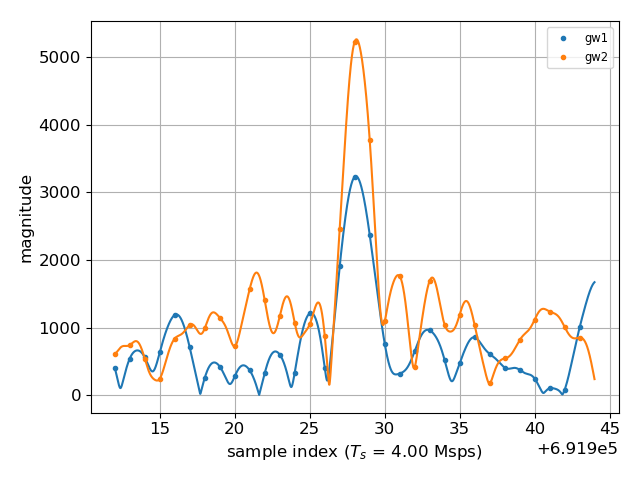

In [135]:
# frew 4 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-56-34.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-56-34.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 508000, 508400)
# compareUpsampled(fileegg, filebanana, 508172, 100, width=32, window=1024, outfile=None, mag=True)
compareUpsampled(fileegg, filebanana, 508172, 100, width=32, window=1024, outfile="results/frew4_905.pdf", mag=True)

# frew 4 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_433.750M_2020-06-13_17-56-44.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_433.750M_2020-06-13_17-56-44.000.dat.npz'

# compareMF(fileegg, filebanana)
# compareMFIndex(fileegg, filebanana, 691800, 692200)
# compareUpsampled(fileegg, filebanana, 691928, 100, width=32, window=1024, outfile=None, mag=True)
compareUpsampled(fileegg, filebanana, 691928, 100, width=32, window=1024, outfile="results/frew4_434.pdf", mag=True)

<IPython.core.display.Javascript object>


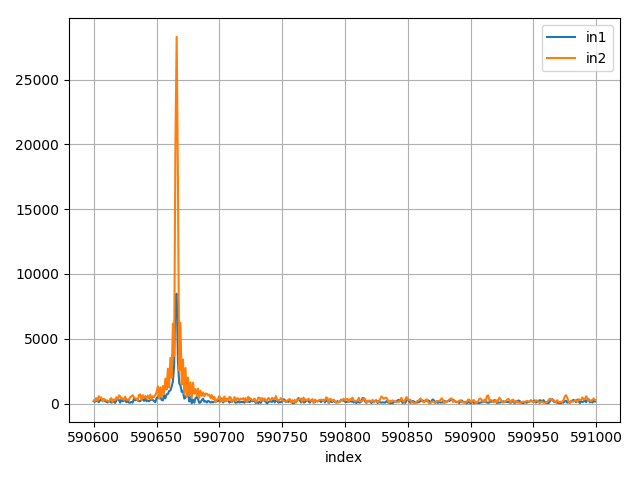

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


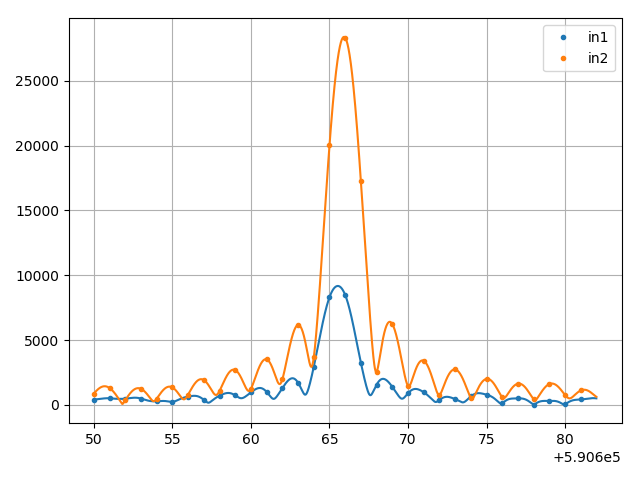

In [95]:
# roberts 1 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-48-37.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-48-37.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 590600, 591000)
compareUpsampled(fileegg, filebanana, 590666, 100, width=32, window=1024, outfile=None, mag=True)

<IPython.core.display.Javascript object>


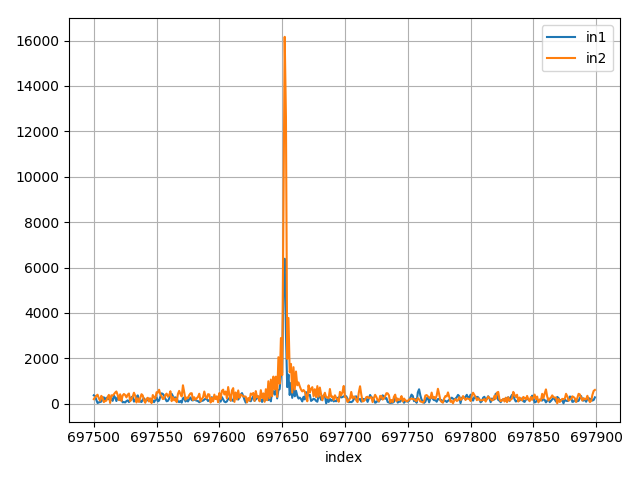

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


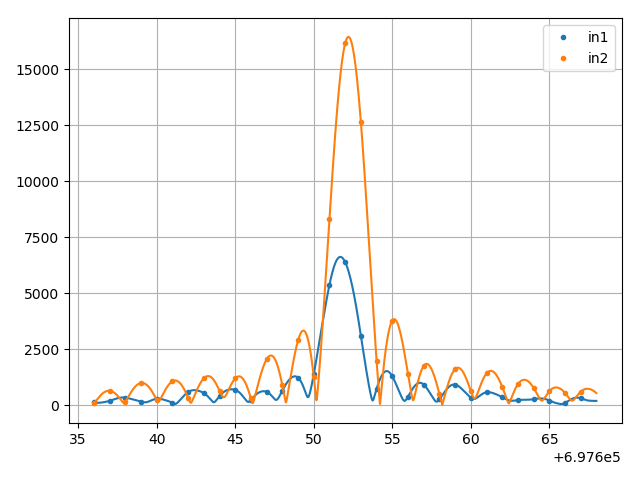

In [97]:
# roberts 2 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-50-02.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-50-02.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 697500, 697900)
compareUpsampled(fileegg, filebanana, 697652, 100, width=32, window=1024, outfile=None, mag=True)

<IPython.core.display.Javascript object>


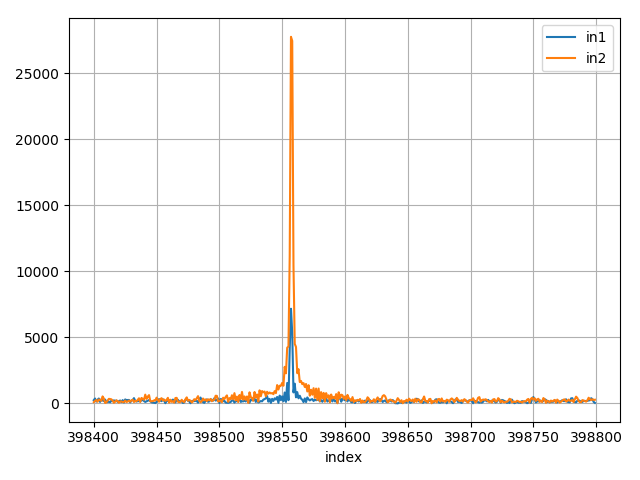

data sampling rates:  3.99999360001024e-06 3.99999360001024e-06


<IPython.core.display.Javascript object>


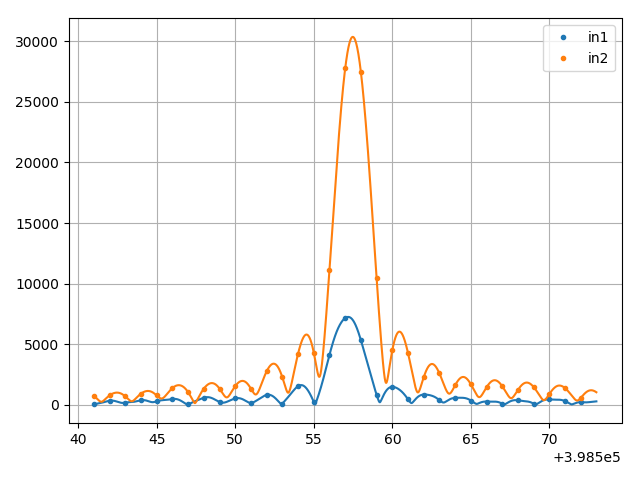

In [99]:
# roberts 3 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/eggtart/mf_exp1_904.750M_2020-06-13_17-50-50.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_13june/bananacream/mf_exp1_904.750M_2020-06-13_17-50-50.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex(fileegg, filebanana, 398400, 398800)
compareUpsampled(fileegg, filebanana, 398557, 100, width=32, window=1024, outfile=None, mag=True)

In [195]:
def compareMFIndex_separatePlots(file1, file2, start, stop, outfile=None, index=True, mag=True):
    f1 = np.load(file1)
    f2 = np.load(file2)
    if index:
        t = np.arange(start, stop)
    else:
        t = f1['t0'] + np.arange(start, stop)*f1['Ts']
    fig, axs = plt.subplots(2)
    d1 = np.abs(f1['data'][start:stop])
    d2 = np.abs(f2['data'][start:stop])
    dmax = 1.1*np.amax([np.amax(d1), np.amax(d2)])
    if mag:
        axs[0].plot(t, d1, "b-", label="gw1")
        
        axs[1].plot(t, d2, "r-", label="gw2")
        axs[0].set_ylim([0, dmax])
        axs[1].set_ylim([0, dmax])
        axs[0].set_ylabel("magnitude")
        axs[1].set_ylabel("magnitude")
    else:
        axs[0].plot(t, f1['data'][start:stop].real, "C0-", label="real(gw1)")
        axs[0].plot(t, f1['data'][start:stop].imag, "C1-", label="imag(gw1)")
        axs[1].plot(t, f2['data'][start:stop].real, "C2-", label="real(gw2)")
        axs[1].plot(t, f2['data'][start:stop].imag, "C3-", label="imag(gw2)")
        axs[0].set_ylim([-dmax, dmax])
        axs[1].set_ylim([-dmax, dmax])
    if index:
        axs[1].set_xlabel("sample index")
        axs[0].set_xlim([start, stop])
        axs[1].set_xlim([start, stop])
    else:
        axs[1].set_xlabel("time (s)")
        axs[0].set_xlim([t[0], t[-1]])
        axs[1].set_xlim([t[0], t[-1]])
    
    axs[0].grid()
    axs[1].grid()
    axs[0].legend(fontsize='x-small', loc='upper right')
    axs[1].legend(fontsize='x-small', loc='upper right')
    plt.tight_layout()
    if outfile:
        plt.savefig(outfile, format='pdf')

<IPython.core.display.Javascript object>


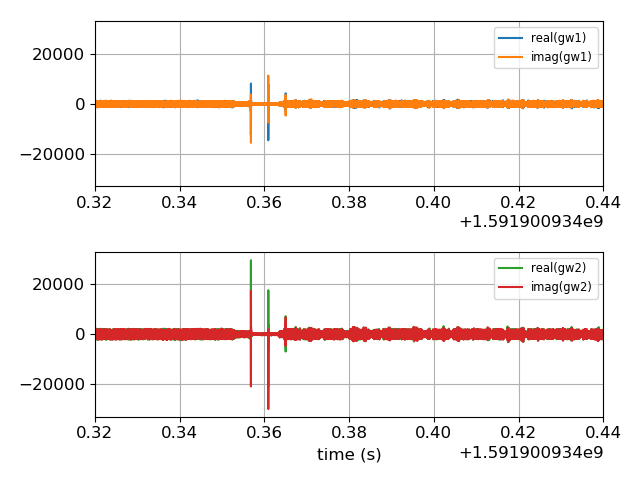

<IPython.core.display.Javascript object>


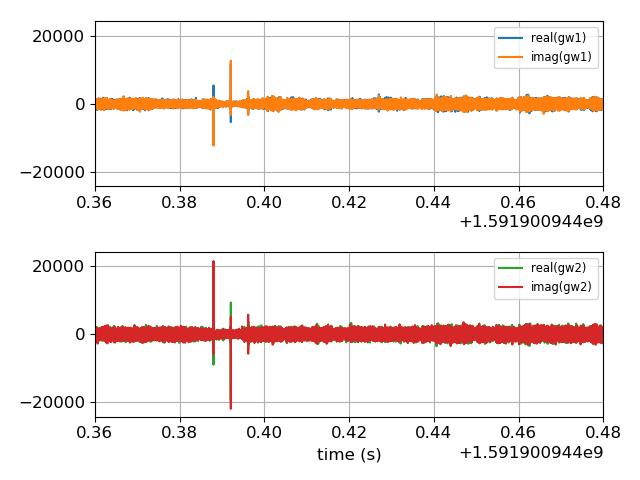

In [196]:
# June 11 test - close location

# 905
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/eggtart/mf_exp1_904.750M_2020-06-11_18-42-13.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/bananacream/mf_exp1_904.750M_2020-06-11_18-42-13.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex_separatePlots(fileegg, filebanana, 330000, 360000, index=False, mag=False, outfile="results/mf_close_905.pdf")

# 434
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/eggtart/mf_exp1_433.750M_2020-06-11_18-42-23.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/bananacream/mf_exp1_433.750M_2020-06-11_18-42-23.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex_separatePlots(fileegg, filebanana, 340000, 370000, index=False, mag=False, outfile="results/mf_close_434.pdf")


<IPython.core.display.Javascript object>


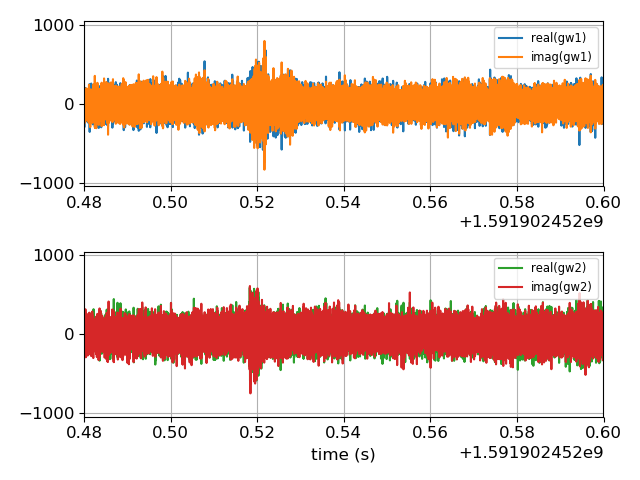

<IPython.core.display.Javascript object>


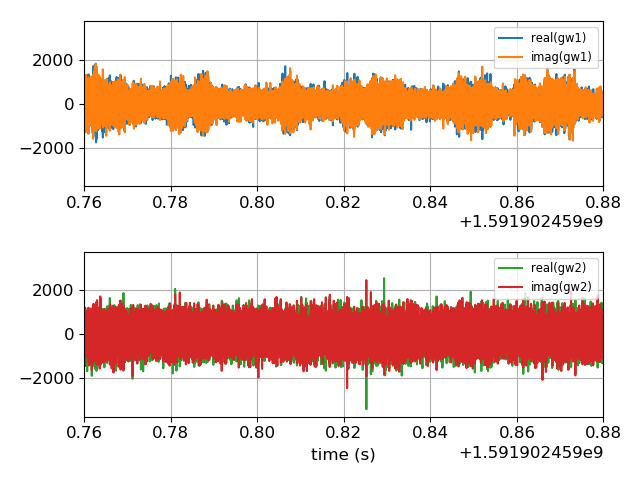

In [209]:
# June 11 test - far location

# 905 MHz
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/eggtart/mf_exp1_904.750M_2020-06-11_19-07-29.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/bananacream/mf_exp1_904.750M_2020-06-11_19-07-29.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex_separatePlots(fileegg, filebanana, 870000, 900000, index=False, mag=False, outfile="results/mf_far_905.pdf")

# 434 MHz
fileegg = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/eggtart/mf_exp1_433.750M_2020-06-11_19-07-39.000.dat.npz'
filebanana = '/media/adwait/44EE36CDEE36B6D0/workspace/sdr_data/matchedfilter/outdoor_11june/bananacream/mf_exp1_433.750M_2020-06-11_19-07-39.000.dat.npz'

# compareMF(fileegg, filebanana)
compareMFIndex_separatePlots(fileegg, filebanana, 190000, 220000, index=False, mag=False, outfile="results/mf_far_434.pdf")
# compareMFIndex_separatePlots(fileegg, filebanana, 190000, 220000, index=False, mag=False)